In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import umap

In [2]:
data = pd.read_table("../data/201028_GSE122505_Leukemia_clean.txt", sep="\t")

In [3]:
data.disease.value_counts()

AML                                         969
ALL                                         906
Infection                                   113
CLL                                          85
healthy                                      82
Diabetes_Type_I                              74
AMKL                                         63
Diabetes_Type_II                             29
CML                                          22
clinically_isolated_syndrome                 18
MDS                                          10
DS_transient_myeloproliferative_disorder      8
Name: disease, dtype: int64

In [4]:
data["disease"] = np.where(data["disease"] == "Diabetes_Type_I" , "Diabetes", data["disease"])
data["disease"] = np.where(data["disease"] == "Diabetes_Type_II" , "Diabetes", data["disease"])
other = ['CML','clinically_isolated_syndrome', 'MDS', 'DS_transient_myeloproliferative_disorder']
data = data[~data.disease.isin(other)]
data.shape
target = data["disease"]
df = data.drop("disease", 1)
df = df.drop("GSM", 1)
df = df.drop("FAB", 1)
df.shape
target.value_counts()

AML          969
ALL          906
Infection    113
Diabetes     103
CLL           85
healthy       82
AMKL          63
Name: disease, dtype: int64

In [16]:
data

,DDR1,MIR4640,RFC2,HSPA6,PAX8,GUCA1A,MIR5193,UBA7,THRA,PTPN21,...,LOC100129924,FAM86B1,FAM86B2,FAM86DP,FAM86FP,SNHG17,LOC100505915,GSM,disease,FAB
0,7.135135,7.135135,6.482099,6.676021,6.645632,6.382956,9.792603,9.792603,6.519152,5.807912,...,5.566997,7.410738,7.410738,7.410738,7.410738,7.482258,5.944763,1,AML,M2
1,7.379455,7.379455,6.824016,6.575389,6.866953,5.777188,9.868853,9.868853,6.739256,5.394392,...,6.389914,7.684605,7.684605,7.684605,7.684605,7.800407,6.344267,2,AML,M4
2,7.776574,7.776574,6.777692,6.833048,6.740570,5.758784,9.503343,9.503343,6.585977,5.269234,...,6.359589,7.432409,7.432409,7.432409,7.432409,7.514223,6.742695,3,AML,M2
3,7.610568,7.610568,6.876088,6.331511,6.806035,5.697665,10.752530,10.752530,6.454185,5.232170,...,6.214732,7.004306,7.004306,7.004306,7.004306,8.008685,6.567193,4,AML,M2
4,7.734832,7.734832,7.227384,6.647835,6.610387,5.643476,10.536639,10.536639,6.391109,5.396083,...,6.360325,7.707046,7.707046,7.707046,7.707046,7.715277,6.274365,5,AML,M2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2374,7.038301,7.038301,6.850005,7.901066,6.346733,5.267717,7.767640,7.767640,6.419903,5.186932,...,6.376156,6.644048,6.644048,6.644048,6.644048,7.711407,5.770466,2375,AML,M1
2375,7.345443,7.345443,6.636042,6.879693,6.672030,6.021948,8.308662,8.308662,6.669993,5.549938,...,6.243571,7.027639,7.027639,7.027639,7.027639,7.192586,6.124443,2376,AML,unknown
2376,6.712769,6.712769,6.383325,6.440957,6.420609,5.559144,8.105112,8.105112,6.381601,5.335782,...,6.473089,6.537953,6.537953,6.537953,6.537953,7.530842,5.957701,2377,AML,M6
2377,6.773485,6.773485,6.665699,6.688221,6.425495,5.712962,7.996249,7.996249,6.493025,5.208735,...,6.118339,6.716129,6.716129,6.716129,6.716129,7.172273,5.952782,2378,AML,unknown


In [5]:
df = df.drop(df.var()[(df.var() < 0.3)].index, axis=1)
from scipy.stats import zscore
df = df.apply(zscore)
df.shape

(2321, 4311)

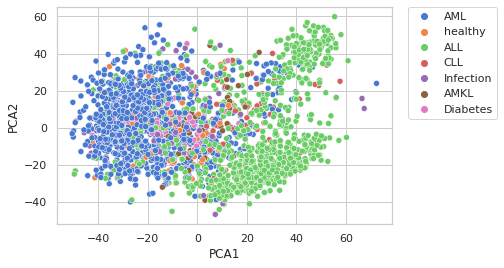

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
X = pca.fit(df).transform(df)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(target)
y_lan = le.transform(target)
pca_df = pd.DataFrame(columns = ["x", "y", "name", "label"])
pca_df["PCA1"] = X[:, 0]
pca_df["PCA2"] = X[:, 1]
pca_df["Disease"] = target
pca_df["label"] = y_lan
sns.set(style="whitegrid", palette="muted")
#sns.set_theme(style=”whitegrid”)
ax = sns.scatterplot(x="PCA1", y="PCA2", hue="Disease", data=pca_df)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
linked = linkage(df, 'ward')
#plotting the dendrogram
plt.figure(figsize=(100, 15))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.show()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/mnt/d/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-13-f4ac9978bad1>", line 7, in <module>
    plt.show()
  File "/mnt/d/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py", line 353, in show
    return _backend_mod.show(*args, **kwargs)
  File "/mnt/d/anaconda3/lib/python3.8/site-packages/ipykernel/pylab/backend_inline.py", line 41, in show
    display(
  File "/mnt/d/anaconda3/lib/python3.8/site-packages/IPython/core/display.py", line 313, in display
    format_dict, md_dict = format(obj, include=include, exclude=exclude)
  File "/mnt/d/anaconda3/lib/python3.8/site-packages/IPython/core/formatters.py", line 180, in format
    data = formatter(obj)
  File "/mnt/d/anaconda3/lib/python3.8/site-packages/decorator.py", line 231, in fun
    return caller(func, *(extras + args), **kw)
  File "/mnt/d/anaconda3/lib/p

TypeError: object of type 'NoneType' has no len()

In [14]:
df

,DDR1,MIR4640,HSPA6,MIR5193,UBA7,CCL5,CAPNS1,RPL35,PARK7,GDI2,...,UBQLN4,SH3BP4,C1orf186,LOC100505650,LOC101929219,PDCD4-AS1,SCAF4,LOC100996756,SNHG17,LOC100505915
0,-0.471928,-0.471928,-0.355684,0.619148,0.619148,-0.416086,-0.110110,0.293529,-0.088566,0.454249,...,-1.469325,0.747530,0.390364,0.390364,0.390364,0.836029,-0.284017,-0.332443,-0.279026,-0.989908
1,-0.103773,-0.103773,-0.472175,0.729567,0.729567,-0.144943,0.144486,0.116973,-0.910462,-0.121003,...,-0.068455,-0.546386,1.193760,1.193760,1.193760,0.637658,-0.480486,0.060732,0.233444,-0.260841
2,0.494631,0.494631,-0.173907,0.200266,0.200266,-0.590619,0.337506,0.480111,-0.372689,0.805617,...,0.081148,-0.602207,1.181798,1.181798,1.181798,-0.140647,-0.887965,-0.815411,-0.227537,0.466262
3,0.244482,0.244482,-0.754491,2.009232,2.009232,-0.224925,1.645925,0.742456,0.057499,0.783056,...,0.424621,-0.766851,0.932920,0.932920,0.932920,1.730815,-0.041091,-0.971326,0.568935,0.145983
4,0.431731,0.431731,-0.388312,1.696598,1.696598,-0.171753,1.454602,1.154402,0.642385,0.412450,...,-0.005121,-0.528034,1.191731,1.191731,1.191731,1.097860,-0.489544,0.572559,0.096318,-0.388408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2374,-0.617843,-0.617843,1.062437,-2.313230,-2.313230,0.683324,-1.975393,-1.458370,0.349908,-1.981195,...,-1.793447,0.519300,-0.947822,-0.947822,-0.947822,-1.020471,-1.294907,0.687404,0.090084,-1.307988
2375,-0.155023,-0.155023,-0.119911,-1.529768,-1.529768,1.281950,-2.147122,-2.644195,-0.305043,-2.022611,...,-1.620821,0.403164,-0.145235,-0.145235,-0.145235,1.141156,-0.713300,0.750613,-0.745625,-0.662005
2376,-1.108374,-1.108374,-0.627795,-1.824532,-1.824532,0.041295,-1.704160,-0.781311,0.198087,-1.162277,...,-1.948629,0.727465,-0.856136,-0.856136,-0.856136,-0.088342,0.181127,-0.508014,-0.200767,-0.966297
2377,-1.016884,-1.016884,-0.341561,-1.982178,-1.982178,0.465859,-2.372215,-3.702494,0.321495,-1.012596,...,-1.635576,0.497593,-0.721555,-0.721555,-0.721555,1.919037,1.267553,2.590434,-0.778344,-0.975274


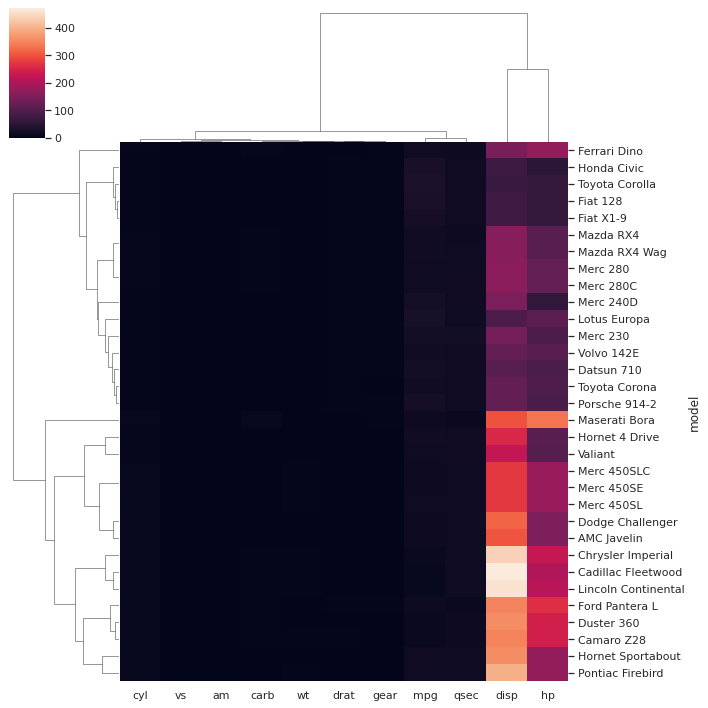

In [17]:
# Libraries
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
 
# Data set
url = 'https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/mtcars.csv'
df = pd.read_csv(url)
df = df.set_index('model')
 
# Default plot
sns.clustermap(df)

# Show the graph
plt.show()

In [18]:
df

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
